In [1]:
from datetime import datetime
import math

import requests
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import mplcursors

from jupyterthemes import jtplot
jtplot.style(theme='chesterish')


%matplotlib inline

In [2]:
API_KEY = "00f87e2d3e6714f9abf7caf5804fe7f92943392afd7e581d25d62ce138da4d41"
PRICE_URL = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&api_key={API_KEY}"

In [3]:
response_json = requests.get(PRICE_URL).json()
eth_df = pd.DataFrame(response_json["Data"]["Data"])

In [4]:
time_baseline = 1438232400 # ETH Launched 2015-07-30
eth_df["time_since_launch"] = eth_df["time"] - time_baseline

In [5]:
# Linear fit for log(time_since_launch) and log(close)
m, b = np.polyfit(eth_df["time_since_launch"].apply(math.log10), eth_df["close"].apply(math.log10), 1)
m_min = m - .09
m_max = m + .135

low_m = (m_min + m) / 2
high_m = (m_max + (2*m)) / 3
higher_m = ((2*m_max) + m) / 3
m, b

(2.192014215996708, -15.216422229774796)

In [6]:
# Add dummy rows for a year
years = 5
secs_in_day = 86400
max_day = eth_df["time"].max()
new_rows = [
    {
        "time": max_day + (i * secs_in_day),
        "time_since_launch": max_day - time_baseline + (i * secs_in_day),
    }
    for i in range(1, (years * 365) + 1)
]
eth_df = eth_df.append(new_rows)
eth_df["date"] = eth_df["time"].apply(datetime.fromtimestamp)

In [7]:
# Calculate regression curves
eth_df["log_regression"] = eth_df["time_since_launch"].apply(lambda x: 10 ** (m * math.log10(x) + b))
eth_df["min_log_regression"] = eth_df["time_since_launch"].apply(lambda x: 10 ** (m_min * math.log10(x) + b))
eth_df["max_log_regression"] = eth_df["time_since_launch"].apply(lambda x: 10 ** (m_max * math.log10(x) + b))
eth_df["low_log_regression"] = eth_df["time_since_launch"].apply(lambda x: 10 ** (low_m * math.log10(x) + b))
eth_df["high_log_regression"] = eth_df["time_since_launch"].apply(lambda x: 10 ** (high_m * math.log10(x) + b))
eth_df["higher_log_regression"] = eth_df["time_since_launch"].apply(lambda x: 10 ** (higher_m * math.log10(x) + b))

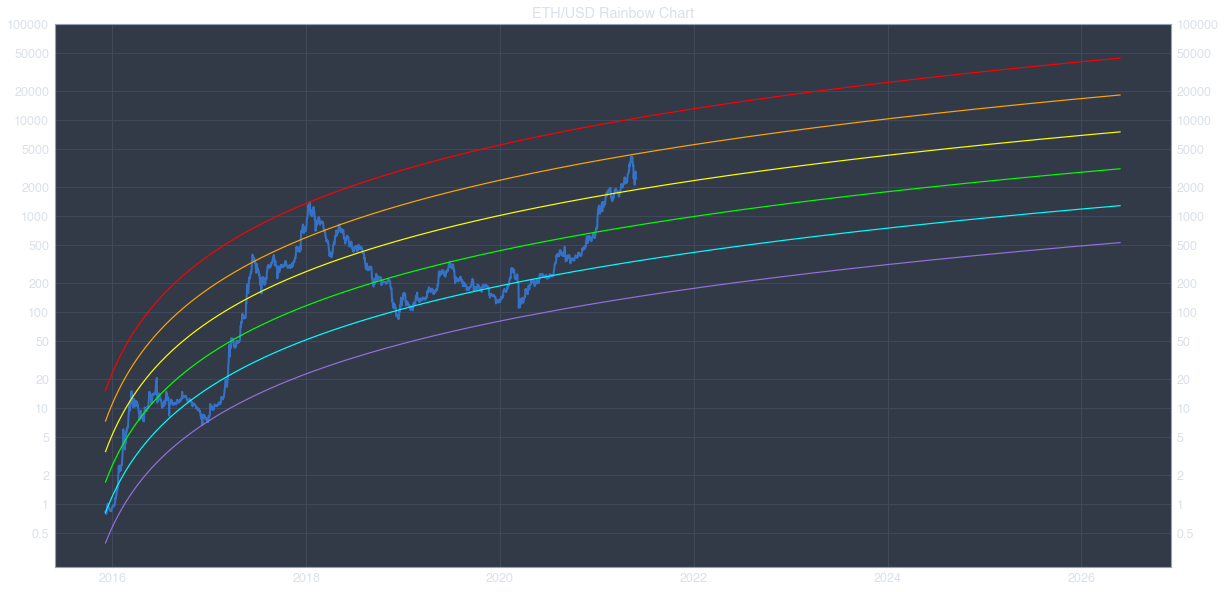

In [20]:
plt.figure(figsize=(20,10));
plt.plot(eth_df["date"], eth_df["close"], linewidth=2);
plt.plot(eth_df["date"], eth_df["min_log_regression"], color="mediumpurple")
plt.plot(eth_df["date"], eth_df["low_log_regression"], color="cyan")
plt.plot(eth_df["date"], eth_df["log_regression"], color="lime")
plt.plot(eth_df["date"], eth_df["high_log_regression"], color="yellow")
plt.plot(eth_df["date"], eth_df["higher_log_regression"], color="orange")
plt.plot(eth_df["date"], eth_df["max_log_regression"], color="red")
plt.yscale('log');
plt.yticks(
    [0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
    [0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
)
plt.gca().tick_params(labelright=True)
plt.title("ETH/USD Rainbow Chart");